## Libraries

In [56]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [57]:
# Read the file resulsSPECIFICITY.csv into a pandas dataframe
df = pd.read_csv('resultsSPECIFICITY.csv', delimiter=';')

# Group the dataframe by OldFM, NewFM, Generator, and for the other columns compute the average
df = df.groupby(['OldFM', 'NewFM', 'Generator']).mean()
# Reset the index
df = df.reset_index()

## Wilcoxon-Signed Rank Tests

In [58]:
def test(datax, datay, label):
    test_times = stats.wilcoxon(datax, datay, alternative='two-sided', method='approx')
    print ("*** Test on " + label + " ***")
    print (test_times)
    print (datax.mean())
    print (datay.mean())
    print ("Effect size: " + str(test_times.zstatistic / math.sqrt(len(datax) + len(datay))))

### Fault detection

In [59]:
faultDetectionACTS = df.loc[df['Generator'] == 'ACTS', 'FaultDetection'].values
faultDetectionSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'FaultDetection'].values
faultDetectionBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'FaultDetection'].values
faultDetectionMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'FaultDetection'].values
# Test the difference between the two generators
test(faultDetectionACTS, faultDetectionSPEC, "ACTS vs SPECIFICITY")
test(faultDetectionACTS, faultDetectionBDD, "ACTS vs BDD")
test(faultDetectionACTS, faultDetectionMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(faultDetectionBDD, faultDetectionSPEC, "BDD vs SPECIFICITY")
test(faultDetectionBDD, faultDetectionMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")


*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=255.5, pvalue=0.6550303837743114)
0.7405379397195122
0.740184017792683
Effect size: -0.034888038332672754
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=233.0, pvalue=0.395988932165689)
0.7405379397195122
0.7401843351585367
Effect size: -0.06628065779789927
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=165.5, pvalue=0.79944787008027)
0.7405379397195122
0.7405356341463416
Effect size: -0.01983888790564852
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=172.5, pvalue=0.6916741040514165)
0.7401843351585367
0.740184017792683
Effect size: -0.030968023384351964
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=217.0, pvalue=0.7498008074984992)
0.7401843351585367
0.7405356341463416
Effect size: -0.024902064583605454
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=214.0, pvalue=0.7034441550182335)
0.740184017792683
0.7405356341463416
Effect size: -0.0297257

### Specificity

In [60]:
specificityACTS = df.loc[df['Generator'] == 'ACTS', 'Specificity'].values
specificitySPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Specificity'].values
specificityBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Specificity'].values
specificityMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Specificity'].values
# Test the difference between the two generators
test(specificityACTS, specificitySPEC, "ACTS vs SPECIFICITY")
test(specificityACTS, specificityBDD, "ACTS vs BDD")
test(specificityACTS, specificityMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(specificityBDD, specificitySPEC, "BDD vs SPECIFICITY")
test(specificityBDD, specificityMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(specificitySPEC, specificityMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=2.7015948487105505e-05)
0.4820944640975609
0.5313336570365853
Effect size: -0.32775121882711133
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=64.0, pvalue=0.042434174712520645)
0.4820944640975609
0.49907011381097566
Effect size: -0.15845677416964024
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=254.5, pvalue=0.46178950128527485)
0.4820944640975609
0.491289201097561
Effect size: -0.057464399474557275
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=1.0, pvalue=4.612538017926031e-05)
0.49907011381097566
0.5313336570365853
Effect size: -0.3181602412886653
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=252.0, pvalue=0.4364569912877593)
0.49907011381097566
0.491289201097561
Effect size: -0.06076643252070372
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=162.0, pvalue=0.020480610502785396)
0.5313336570365853
0.491289201097561
Effect size: 

In [ ]:
specificTestsACTS = df.loc[df['Generator'] == 'ACTS', 'NSpecificTests'].values
specificTestsSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'NSpecificTests'].values
specificTestsBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'NSpecificTests'].values
specificTestsMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'NSpecificTests'].values

### Time

In [61]:
timeACTS = df.loc[df['Generator'] == 'ACTS', 'Time'].values
timeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Time'].values
timeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Time'].values
timeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Time'].values
# Test the difference between the two generators
test(timeACTS, timeSPEC, "ACTS vs SPECIFICITY")
test(timeACTS, timeBDD, "ACTS vs BDD")
test(timeACTS, timeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(timeBDD, timeSPEC, "BDD vs SPECIFICITY")
test(timeBDD, timeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(timeSPEC, timeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=3.663275894851821e-15)
107.65853658536585
26.924390243902437
Effect size: -0.6142269474763654
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=0.0, pvalue=3.663890942678321e-15)
107.65853658536585
42.41707317073171
Effect size: -0.6142253066039589
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.662660943750367e-15)
107.65853658536585
25.31951219512195
Effect size: -0.6142285883619224
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=13.0, pvalue=5.909948131064861e-15)
42.41707317073171
26.924390243902437
Effect size: -0.6095348728349685
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.662968407211321e-15)
42.41707317073171
25.31951219512195
Effect size: -0.6142277679175001
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=400.0, pvalue=2.9357670954374376e-09)
26.924390243902437
25.31951219512195
Effect size: -0.46345

### Size

In [62]:
sizeACTS = df.loc[df['Generator'] == 'ACTS', 'Size'].values
sizeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Size'].values
sizeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Size'].values
sizeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Size'].values
# Test the difference between the two generators
test(sizeACTS, sizeSPEC, "ACTS vs SPECIFICITY")
test(sizeACTS, sizeBDD, "ACTS vs BDD")
test(sizeACTS, sizeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(sizeBDD, sizeSPEC, "BDD vs SPECIFICITY")
test(sizeBDD, sizeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(sizeSPEC, sizeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=603.0, pvalue=0.43333623804747035)
8.475609756097562
8.685365853658537
Effect size: -0.06118071412909993
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=654.5, pvalue=0.9364425084502694)
8.475609756097562
8.581707317073171
Effect size: -0.006226798775593428
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=713.0, pvalue=0.0011662052575471718)
8.475609756097562
7.097560975609756
Effect size: -0.25354960101138146
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=275.0, pvalue=0.06926470512897845)
8.581707317073171
8.685365853658537
Effect size: -0.141859598998474
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=757.0, pvalue=0.002820427647835429)
8.581707317073171
7.097560975609756
Effect size: -0.23321900121317427
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=759.0, pvalue=0.002930587210516576)
8.685365853658537
7.097560975609756
Effect size: -0.23230273

### Tuples Covered

In [63]:
tpACTS = df.loc[df['Generator'] == 'ACTS', 'CombinatorialCoverage'].values
tpSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'CombinatorialCoverage'].values
tpBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'CombinatorialCoverage'].values
tpMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'CombinatorialCoverage'].values
# Test the difference between the two generators
test(tpACTS, tpMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(tpBDD, tpMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(tpSPEC, tpMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.5291038980355267e-15)
1.0
0.4612083706097561
Effect size: -0.6145915469879835
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.5291038980355267e-15)
1.0
0.4612083706097561
Effect size: -0.6145915469879835
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=3.5291038980355267e-15)
1.0
0.4612083706097561
Effect size: -0.6145915469879835


## Box-Plots

In [64]:
def box_plot(y1, y2, y3, y4, ylabel, xscale = 'log', plot_correspondence = False, scale = 1, showfliers = True):
    plt.figure(figsize=(4,2.5))
    sns.boxplot(data=[y1/scale, y2/scale, y3/scale, y4/scale], orient='h', showfliers = showfliers, showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"white"})
    plt.xscale(xscale)
    plt.yticks(range(4), labels=['ACTS', 'BDD', 'SPECGEN', 'MUTTESTGEN'])
    plt.xlabel(ylabel)
    plt.show()

### Fault detection

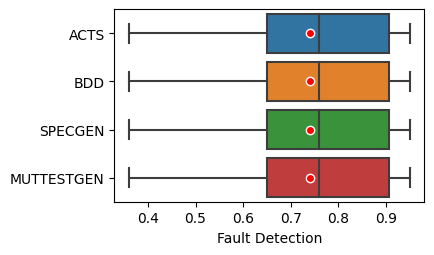

In [65]:
box_plot(faultDetectionACTS, faultDetectionBDD, faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, 'Fault Detection', xscale = 'linear', scale = 1, showfliers = False)

### Specificity

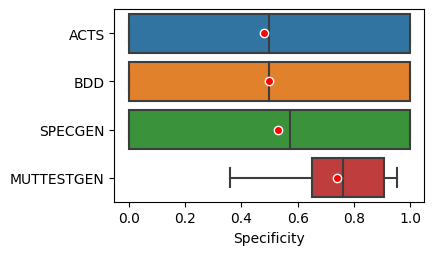

In [66]:
box_plot(specificityACTS, specificityBDD, specificitySPEC, faultDetectionMUTTESTGENERATOR, 'Specificity', xscale = 'linear', scale = 1, showfliers = False)

In [ ]:
box_plot(specificTestsACTS, specificTestsBDD, specificTestsSPEC, specificTestsMUTTESTGENERATOR, '# of Specific Tests', xscale = 'linear', scale = 1, showfliers = False)

### Time

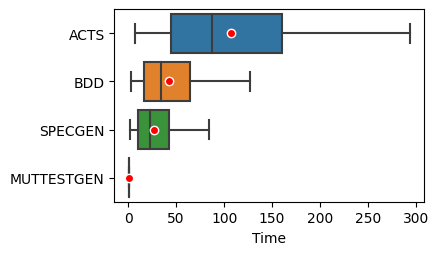

In [67]:
box_plot(timeACTS, timeBDD, timeSPEC, faultDetectionMUTTESTGENERATOR, 'Time', xscale = 'linear', scale = 1, showfliers = False)

### Size

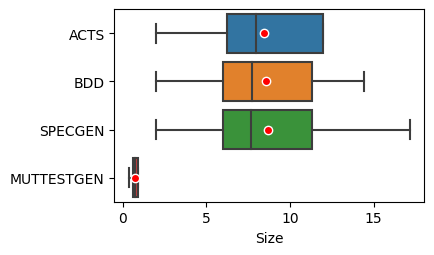

In [68]:
box_plot(sizeACTS, sizeBDD, sizeSPEC, faultDetectionMUTTESTGENERATOR, 'Size', xscale = 'linear', scale = 1, showfliers = False)

### Tuples Covered

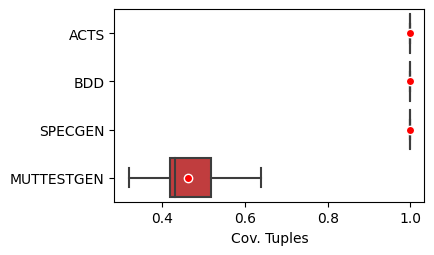

In [42]:
box_plot(tpACTS, tpBDD, tpSPEC, tpMUTTESTGENERATOR, 'Cov. Tuples', xscale = 'linear', scale = 1, showfliers = False)